In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pt

In [2]:
# Import cells csv file
CELLS_PATH = "../data/TrackML/train_1/event000001000-cells.csv"
TRUTH_PATH = "../data/TrackML/train_1/event000001000-truth.csv"
HITS_PATH = "../data/TrackML/train_1/event000001000-hits.csv"



cells = pt.read_csv(CELLS_PATH)
truth = pt.read_csv(TRUTH_PATH, index_col=0)
hits = pt.read_csv(HITS_PATH, index_col=0)


In [3]:
# Summarize the cells df
print(cells.info())
print(cells.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664996 entries, 0 to 664995
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   hit_id  664996 non-null  int64  
 1   ch0     664996 non-null  int64  
 2   ch1     664996 non-null  int64  
 3   value   664996 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 20.3 MB
None
              hit_id            ch0            ch1         value
count  664996.000000  664996.000000  664996.000000  6.649960e+05
mean    49603.957174     211.529248     444.395715  3.560307e-01
std     32415.296519     156.399517     411.081790  4.324582e-01
min         1.000000       0.000000       0.000000  1.461840e-07
25%     25174.000000      97.000000      55.000000  5.364857e-02
50%     36148.000000     191.000000     340.000000  6.512935e-02
75%     78196.000000     287.000000     802.000000  1.000000e+00
max    120939.000000    1195.000000    1279.000000  1.000000e+00


<Axes: >

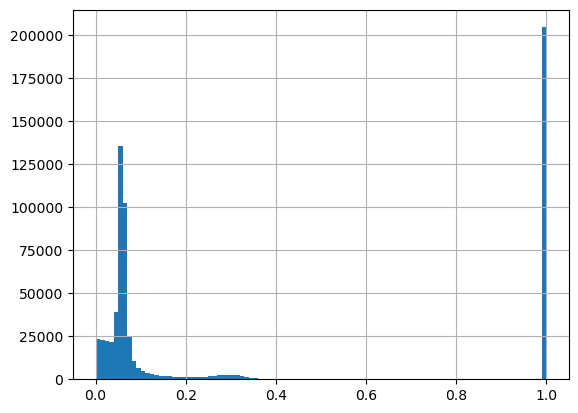

In [4]:
cells['value'].hist(bins=100)

In [5]:
track_hits_mask = truth['particle_id'] != 0
only_track_hits = truth[track_hits_mask]

# Multiple rows in cells can correspond to the same hit_id

# Mask for which row in cells corresponds to a track hit vs a background hit
# Initialize empty mask
track_hits = np.zeros(cells.shape[0], dtype=bool)
not_track_hits = np.zeros(cells.shape[0], dtype=bool) # opposite mask
# Loop over all cells
for i in range(cells.shape[0]):
    # Get the cell id
    cell_row = cells.iloc[i]
    # Get the hit id
    is_track_hit = cell_row['hit_id'] in only_track_hits.index
    # Set the mask
    track_hits[i] = is_track_hit
    not_track_hits[i] = not is_track_hit
# Get the cell track hits (i.e. the cells that correspond to track hits)
cell_track_hits = cells[track_hits]
cell_not_track_hits = cells[not_track_hits]

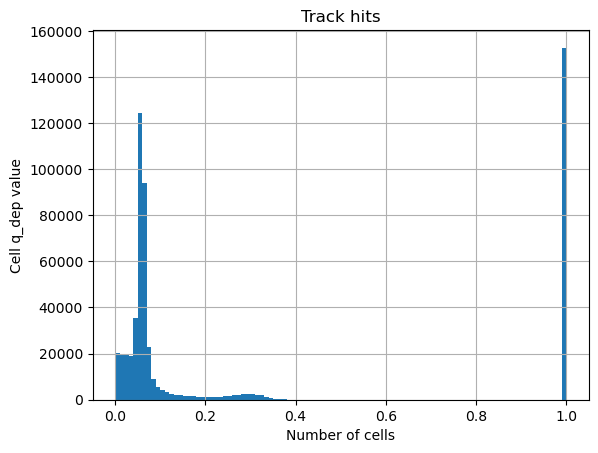

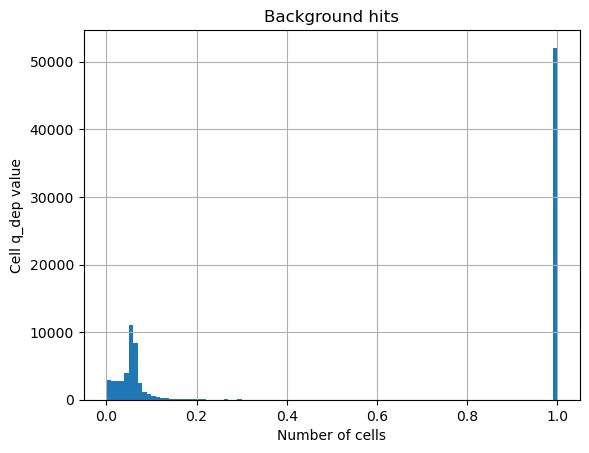

In [6]:
cell_track_hits['value'].hist(bins=100)
plt.title("Track hits")
plt.xlabel("Number of cells")
plt.ylabel("Cell q_dep value")
plt.show()

cell_not_track_hits['value'].hist(bins=100)
plt.title("Background hits")
plt.xlabel("Number of cells")
plt.ylabel("Cell q_dep value")
plt.show()


In [8]:
# Get the x, y, z coordinates of the cells with value == 1
cells_1 = cells[cells['value'] != 1]
hit_ids_1 = cells_1['hit_id'].unique()
hits_1 = hits.iloc[hits.index.isin(hit_ids_1)]

# 3D scatter plot of hits using plotly
import plotly.express as px
fig = px.scatter_3d(hits_1, x='x', y='y', z='z', title="3D scatter plot of hits with value == 1")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                    width=800,
                    height=800)
fig.show()


count    120939.000000
mean          5.498607
std           7.431057
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          65.000000
dtype: float64


Text(0.5, 1.0, 'Cells hit multiplicity')

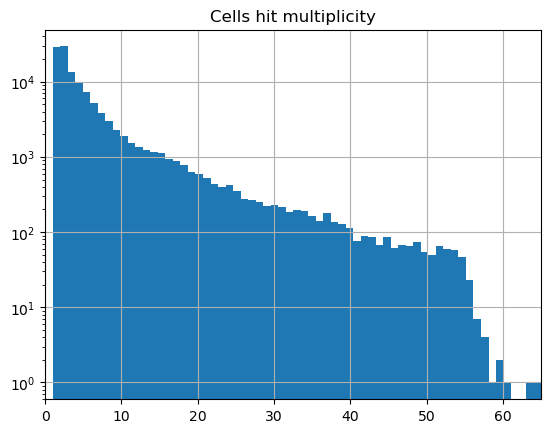

In [9]:
cells_hit_multiplicity = cells.groupby('hit_id').size()
print(cells_hit_multiplicity.describe())
cells_hit_multiplicity.hist(bins=cells_hit_multiplicity.max())
plt.xlim(0, cells_hit_multiplicity.max())
plt.yscale('log')
plt.title("Cells hit multiplicity")

In [10]:
cells.groupby('hit_id')["value"].std()

hit_id
1         0.100751
2              NaN
3         0.035441
4              NaN
5              NaN
            ...   
120935         NaN
120936    0.000000
120937         NaN
120938         NaN
120939         NaN
Name: value, Length: 120939, dtype: float64

In [11]:
# Add hit multiplicity to hits dataframe
hits['cell_multiplicity'] = cells_hit_multiplicity

# Add average cell q_dep to hits dataframe
hits['cell_q_dep'] = cells.groupby('hit_id')['value'].mean()

# Add min, max, and std of cell q_dep to hits dataframe
hits['cell_q_dep_min'] = cells.groupby('hit_id')['value'].min()
hits['cell_q_dep_max'] = cells.groupby('hit_id')['value'].max()

# Log transform the cell q_dep values
hits['cell_q_dep_cuberoot'] = np.power(hits['cell_q_dep'], 1/3) # exclusively for better visualization

In [13]:
# Filter hits to only include positive x values
hits_pos = hits[hits['x'] > 0]

# 3D scatter plot of hits using plotly, showing cell q_dep for each hit
# fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='cell_q_dep',
fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='layer_id',
                    title="3D scatter plot of hits with cell q_dep (x > 0)")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-1000, 1000]),
    yaxis=dict(title='Y', range=[-1000, 1000]),
    zaxis=dict(title='Z', range=[-3000, 3000])
),
width=800,
height=800)
fig.show()

<Axes: >

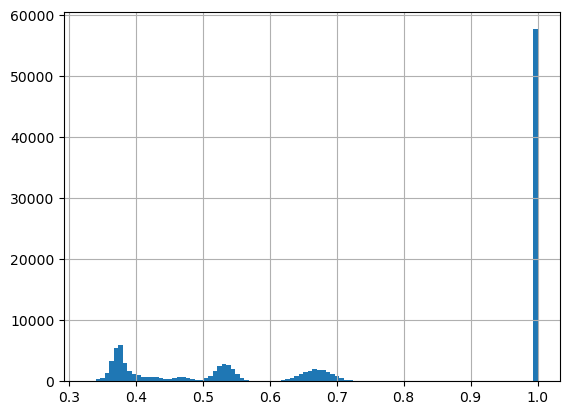

In [98]:
hits["cell_q_dep_cuberoot"].hist(bins=100)

In [ ]:
# Statistical test of intra-track q_dep correlation

# 1) Consider only q_dep < 1, as 1 is a stand-in for no q_dep info
# 2) 

<Axes: >

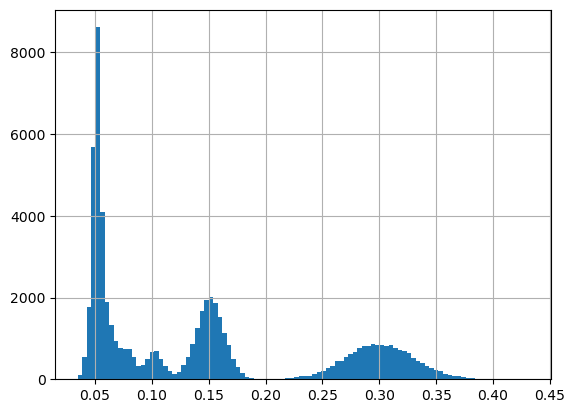

In [115]:
hits[hits['cell_q_dep'] < 1]['cell_q_dep'].hist(bins=100)

In [120]:
# Filter hits to only include positive x values
hits_pos = hits[hits['x'] > 0]
hits_pos = hits_pos[hits_pos['cell_q_dep'] < 1]
hits_pos = hits_pos[(hits_pos['cell_q_dep'] > 0) & (hits_pos['cell_q_dep'] <= 0.07)]

# 3D scatter plot of hits using plotly, showing cell q_dep for each hit
fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='cell_q_dep',
                    title="First peak in cell q_dep")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-1000, 1000]),
    yaxis=dict(title='Y', range=[-1000, 1000]),
    zaxis=dict(title='Z', range=[-3000, 3000])
),
width=800,
height=800)
fig.show()

In [124]:
# Filter hits to only include positive x values
hits_pos = hits[hits['x'] > 0]
hits_pos = hits_pos[hits_pos['cell_q_dep'] < 1]
hits_pos = hits_pos[(hits_pos['cell_q_dep'] > 0.07) & (hits_pos['cell_q_dep'] <= 0.13)]

# 3D scatter plot of hits using plotly, showing cell q_dep for each hit
fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='cell_q_dep',
                    title="Second peak in cell q_dep")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-1000, 1000]),
    yaxis=dict(title='Y', range=[-1000, 1000]),
    zaxis=dict(title='Z', range=[-3000, 3000])
),
width=800,
height=800)
fig.show()

In [125]:
# Filter hits to only include positive x values
hits_pos = hits[hits['x'] > 0]
hits_pos = hits_pos[hits_pos['cell_q_dep'] < 1]
hits_pos = hits_pos[(hits_pos['cell_q_dep'] > 0.13) & (hits_pos['cell_q_dep'] <= 0.20)]

# 3D scatter plot of hits using plotly, showing cell q_dep for each hit
fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='cell_q_dep',
                    title="Second peak in cell q_dep")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-1000, 1000]),
    yaxis=dict(title='Y', range=[-1000, 1000]),
    zaxis=dict(title='Z', range=[-3000, 3000])
),
width=800,
height=800)
fig.show()

In [126]:
# Filter hits to only include positive x values
hits_pos = hits[hits['x'] > 0]
hits_pos = hits_pos[hits_pos['cell_q_dep'] < 1]
hits_pos = hits_pos[(hits_pos['cell_q_dep'] > 0.20) & (hits_pos['cell_q_dep'] <= 0.40)]

# 3D scatter plot of hits using plotly, showing cell q_dep for each hit
fig = px.scatter_3d(hits_pos, x='x', y='y', z='z', color='cell_q_dep',
                    title="Second peak in cell q_dep")
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-1000, 1000]),
    yaxis=dict(title='Y', range=[-1000, 1000]),
    zaxis=dict(title='Z', range=[-3000, 3000])
),
width=800,
height=800)
fig.show()